In [1]:
import trajpy.trajpy as tj
import numpy as np
import matplotlib.pyplot as plt

In [13]:
autocorrelacao = np.loadtxt('vacf2_2.dat')
corr_md_novo = autocorrelacao[:,2] #valor da autocorr.
corr_t_novo = autocorrelacao[:,0]

In [14]:
correlacao = np.loadtxt('vacf2_2.dat',usecols=(0,2))

In [2]:
dados = np.loadtxt('snapshot_2.xyz') #arquivo com as posições
t_dados = dados[:,0]
x1_dados = dados[:,1]
x1_dados = x1_dados.reshape(-1,1)
t_dados = t_dados.reshape(-1,1)
trajetoria = np.concatenate((t_dados,x1_dados),axis=1)

In [27]:
def autocorrelacao_nova(coor,taus,dt):

  media_temporal = np.zeros(len(taus))
  velocidade = np.diff(coor, axis=0)/dt
  N = len(velocidade)
  for tau in taus:
    media_temporal[tau] = (np.sum(np.einsum('ij,ij->i',
                np.take(a=velocidade,indices=np.arange(0,N-tau)+tau,axis=0),
                np.take(a=velocidade,indices=np.arange(0,N-tau),axis=0)))+ 
                media_temporal[tau-1])*dt / (N-tau)

  return media_temporal

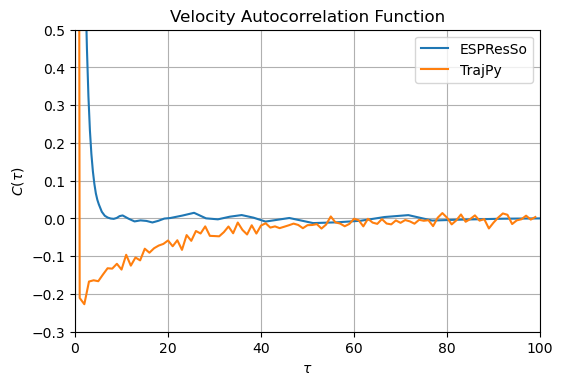

In [26]:
plt.figure(dpi=100)
plt.plot(correlacao[:,0],correlacao[:,1],label='ESPResSo')
plt.plot(np.arange(0,100),autocorrelacao_nova(x1_dados,np.arange(0,100),dt=t_dados[1]-t_dados[0])
         ,label='TrajPy')
plt.title('Velocity Autocorrelation Function')
plt.ylabel(r'$C(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylim(-0.3,0.5)
plt.xlim(0,100)
plt.grid()
plt.legend()
plt.show()

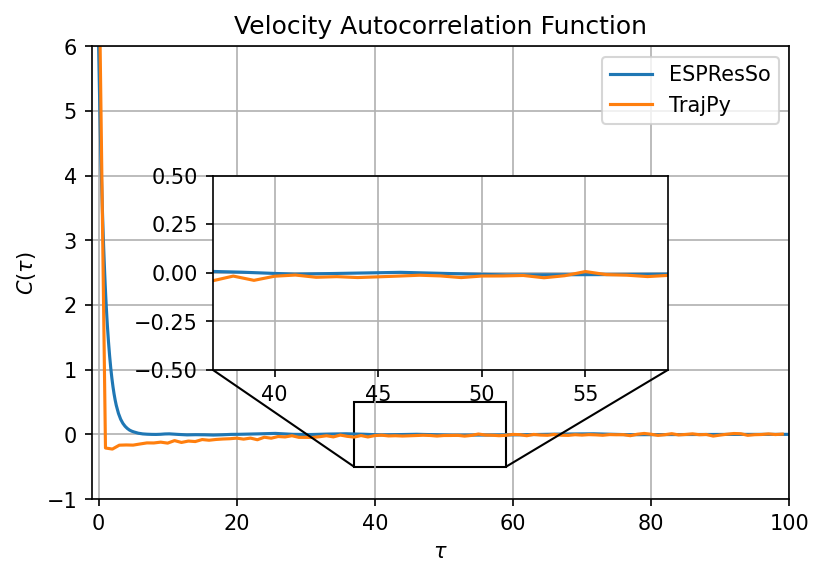

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset
if __name__=='__main__':

    fig = plt.figure(dpi=150)
    ax = plt.subplot(111) #whole path
    plt.title('Velocity Autocorrelation Function')
    plt.ylabel(r'$C(\tau)$')
    plt.xlabel(r'$\tau$')
    plt.plot(correlacao[:,0],correlacao[:,1],label='ESPResSo')
    plt.plot(np.arange(0,100),autocorrelacao_nova(x1_dados,np.arange(0,100),dt=t_dados[1]-t_dados[0])
         ,label='TrajPy')
    ax.set_xlim(-1,100) #altera limites do eixo x do gráfico principal
    ax.set_ylim(-1,6) #altera limites do eixo y do gráfico principal
    ax.grid()
    ax.legend() #legendas do gráfico principal

    axins = zoomed_inset_axes(ax,3,loc='center') #número altera o tamanho do zoom e loc altera a localização
    #da janela de zoom
    axins.plot(correlacao[:,0],correlacao[:,1])
    axins.plot(np.arange(0,100),autocorrelacao_nova(x1_dados,np.arange(0,100),dt=t_dados[1]-t_dados[0]))

    x1,x2,y1,y2 = 37,59, -0.5,0.5 #altera os limites para a região que daremos zoom
    axins.set_xlim(x1,x2)
    axins.set_ylim(y1,y2)
    axins.grid()

    mark_inset(ax,axins,loc1=3,loc2=4) #altera de quais vértices saem as linhas diagonais do zoom
    plt.show()